In [1]:
import numpy as np
from numpy.linalg import eig
from scipy.linalg import svd, expm
import cmath
import matplotlib.pyplot as plt

In [5]:
dim = 30
Kerr = 1
Eps_2 = 5
Kappa = 0.1
nth = 0.1
g1 = Kappa*(nth+1)
g2 = Kappa*nth
ranges = np.linspace(-2, 4, 200)
tt = []
for val in ranges:
    tt.append(10**val)

In [6]:
#operators
ad = np.zeros([dim, dim]) #creation
for i in range(1, dim):
    ad[i][i-1] = np.sqrt(i)

a = np.zeros([dim,dim]) #annihilation
for i in range (1, dim):
    a[i-1][i] = np.sqrt(i)

In [8]:
H = Kerr*(ad@ad)@(a@a)-Eps_2*(ad@ad+a@a)
Eval, Evec = eig(H)
order = np.argsort(Eval)
Eval = Eval[order]
Evec = np.transpose(Evec[:,order])

In [9]:
rhos = []
for i in range(0, 15):
    rhos.append(np.outer(Evec[i], Evec[i]))

## ALTERNATIVE NUMERICAL WAY

In [10]:
m = []
for i in range(dim):
  for l in range(dim):
    m.append(i)
n = []
for l in range(dim):
  for i in range(dim):
    n.append(i)
def kd(i, j):
     if i==j:
         return 1
     else :
         return 0

L1 = a
L2 = ad

LambdaA  =  np.zeros((dim**2,dim**2), dtype=complex)
for k in range(dim**2):
  for l in range(dim**2):
    LambdaA[k][l] = -1j*(kd(m[k], m[l])*H[n[k], n[l]]-H[m[l], m[k]]*kd(n[k], n[l]))+g1*(np.conj(L1[m[k], m[l]])*L1[n[k], n[l]])+g2*(np.conj(L2[m[k], m[l]])*L2[n[k], n[l]])

LambdaB  =  np.zeros((dim**2,dim**2), dtype=complex)
for k in range(dim**2):
  for l in range(dim**2):
    for r in range(dim):
      #Lambda[k][l] = -1j*(kd(m[k], m[l])*H[n[k], n[l]]-H[m[l], m[k]]*kd(n[k], n[l]))+g1*(np.conj(L1[m[k], m[l]])*L1[n[k], n[l]])+g2*(np.conj(L2[m[k], m[l]])*L2[n[k], n[l]])+(g1/2)*(kd(m[k], m[l])*np.conj(L1[r, n[k]])*L1[r, n[l]]+L1[r, m[k]]*np.conj(L1[r, m[l]])*kd(n[k], n[l]))+(g2/2)*(kd(m[k], m[l])*np.conj(L2[r, n[k]])*L2[r, n[l]]+L2[r, m[k]]*np.conj(L2[r, m[l]])*kd(n[k],n[l]))
      LambdaB[k][l] = LambdaB[k][l] + (g1/2)*(kd(m[k], m[l])*np.conj(L1[r, n[k]])*L1[r, n[l]]+L1[r, m[k]]*np.conj(L1[r, m[l]])*kd(n[k], n[l]))+(g2/2)*(kd(m[k], m[l])*np.conj(L2[r, n[k]])*L2[r, n[l]]+L2[r, m[k]]*np.conj(L2[r, m[l]])*kd(n[k],n[l]))

Lambda = LambdaA + LambdaB

In [11]:
Ln, Lv = eig(Lambda)
Lv = np.transpose(Lv)

KLv = Lv #kets stored in rows of matrix
PI = np.linalg.inv(KLv) #bras stored in the columns of matrix
BLv = np.transpose(PI) #bras stored in rows of matrix

In [12]:
ind = []
for i in range(dim**2):
 if abs(Ln[i]) < 0.00001:
  ind.append(i)
print(ind)

[869]


In [15]:
Ln[ind]
lvF = KLv[ind].reshape(dim,dim)

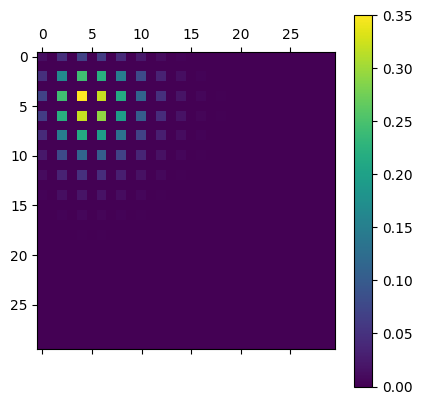

In [16]:
import matplotlib.pyplot as plt

plt.matshow(rhos[1])
plt.colorbar()
plt.show()

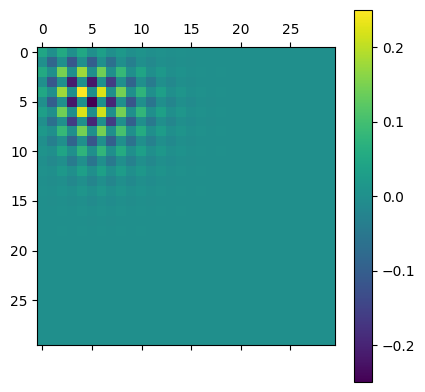

In [17]:

plt.matshow(np.real(lvF))
plt.colorbar()
plt.show()

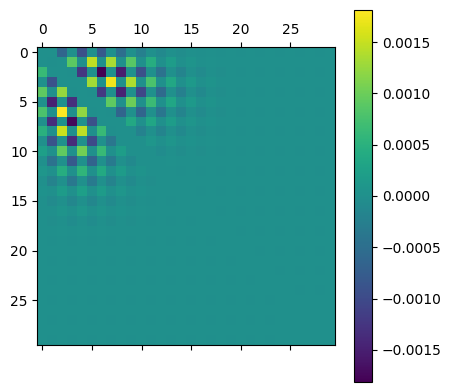

In [18]:
plt.matshow(np.imag(lvF))
plt.colorbar()
plt.show()